In [1]:
!pip install "numpy<2.0"


Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --force-reinstall --no-cache-dir numpy==1.26.4 pandas pyarrow matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
    --------------------------------------- 0.3/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 882.6 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/15.5 MB 1.1 MB/s eta 0:00:14
   -- ------------------------------------- 0.8/15.5 MB 1.1 MB/s eta 0:00:14
   -- ------------------------------------- 1.0/15.5 MB 811.6 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/15.5 MB 811.6 kB/s eta 0:00:18
   ------ --------------------------------- 2.4/15.5 MB 1.4 MB/s eta 0:00:10
   -------- ------------------------------- 3.1/15.5 MB 1.7 MB/s eta 0:00:08
   ----------- ---------------------------- 4.5/15.5 MB 2.3 MB/s eta 0:00:05
   ------------ ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.2.1 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
os.listdir()


['.idea',
 '.ipynb_checkpoints',
 '.venv',
 'app.py',
 'breast cancer.csv.zip',
 'chatbot',
 'CropYield-Prediction.ipynb',
 'database.sqlite3',
 'db.sqlite3',
 'dtr.pkl',
 'main.py',
 'preprocessor.pkl',
 'static',
 'template',
 'templates',
 'vmkvec_admission_bot.ipynb',
 'vmkvec_chatbot.py',
 'yield_df.csv',
 'yield_df.csv.zip',
 '__pycache__']

In [5]:
import zipfile

with zipfile.ZipFile("yield_df.csv.zip", "r") as zip_ref:
    zip_ref.extractall()


In [6]:
import pandas as pd

df = pd.read_csv("yield_df.csv")
df.head()


Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [9]:
df.shape

(28242, 7)

In [10]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [12]:
df.duplicated().sum()

2310

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  25932.000000   25932.000000                   25932.000000   
mean    2001.556455   76978.132925                    1146.836688   
std        7.055924   84647.605552                     717.391098   
min     1990.000000      50.000000                      51.000000   
25%     1995.000000   19996.000000                     593.000000   
50%     2001.000000   39530.000000                    1083.000000   
75%     2008.000000  104168.000000                    1668.000000   
max     2013.000000  501412.000000                    3240.000000   

       pesticides_tonnes      avg_temp  
count       25932.000000  25932.000000  
mean        34782.573241     20.422251  
std         57228.568244      6.439402  
min             0.040000      1.300000  
25%          1597.000000     16.580000  
50%         15373.000000     21.420000  
75%         45620.000000     26.060000  
max        367778.000000     30.650000

In [16]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [17]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

In [18]:
to_drop=df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [19]:
df=df.drop(to_drop)

In [20]:
df

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[25932 rows x 7 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [22]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['Area'])

<Axes: xlabel='count', ylabel='Area'>

In [23]:
 df.head(2)

Area      Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania     Maize  1990        36613                         1485.0   
1  Albania  Potatoes  1990        66667                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37

In [24]:
country=(df['Area'].unique())

In [25]:
yield_per_country=[]
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [26]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

In [27]:
plt.figure(figsize=(10,20))
sns.barplot(y=country,x=yield_per_country)

<Axes: >

<Axes: xlabel='count', ylabel='Item'>

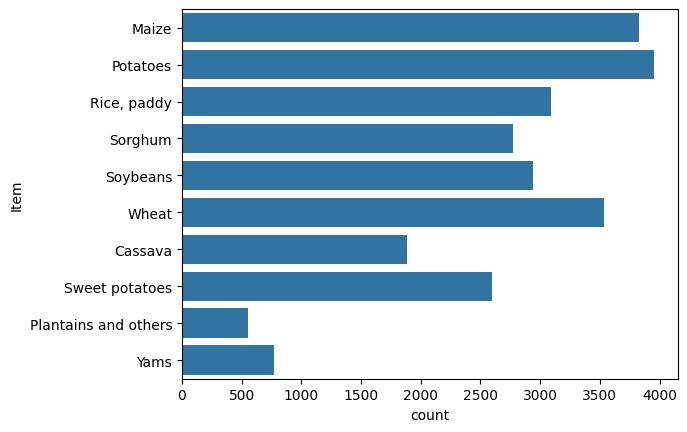

In [28]:
sns.countplot(y=df['Item'])

In [29]:
crops=(df['Item'].unique())

In [30]:
yield_per_item = []  
for crop in crops:
    yield_per_item.append(df[df['Item'] == crop]['hg/ha_yield'].sum())


In [31]:
df

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                             1485.0             121.00     16.37  
1                             1485.0             121.00     16.37  
2                             1485.0             121.00     16.37  
3                             1485.0             121.00     16.37  
4                             1485.0             121.00     16.37  
...                              ...                ...       ...  
28237                          657.0            2550.07     19.76  
28238                          657.0            2550.07     19.76  
28239                          657.0            2550.07     19.76  
28240                          657.0            2550.07     19.76  
28241                          657.0            2550.07     19.76  

[25932 rows x 7 columns]

In [32]:
col=['Year','average_rain_fall_mm_per_year','pesticides_tonnes','avg_temp','Area','Item','hg/ha_yield']
df=df[col]

In [33]:
df

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0      1990                         1485.0             121.00     16.37   
1      1990                         1485.0             121.00     16.37   
2      1990                         1485.0             121.00     16.37   
3      1990                         1485.0             121.00     16.37   
4      1990                         1485.0             121.00     16.37   
...     ...                            ...                ...       ...   
28237  2013                          657.0            2550.07     19.76   
28238  2013                          657.0            2550.07     19.76   
28239  2013                          657.0            2550.07     19.76   
28240  2013                          657.0            2550.07     19.76   
28241  2013                          657.0            2550.07     19.76   

           Area            Item  hg/ha_yield  
0       Albania           Maize        36613  
1       Albania        Potatoes        66667  
2       Albania     Rice, paddy        23333  
3       Albania         Sorghum        12500  
4       Albania        Soybeans         7000  
...         ...             ...          ...  
28237  Zimbabwe     Rice, paddy        22581  
28238  Zimbabwe         Sorghum         3066  
28239  Zimbabwe        Soybeans        13142  
28240  Zimbabwe  Sweet potatoes        22222  
28241  Zimbabwe           Wheat        22888  

[25932 rows x 7 columns]

In [34]:
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [37]:
x_train.shape

(20745, 6)

In [38]:
x_test.shape

(5187, 6)

In [39]:
x_train

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
24234  2000                           59.0            3024.11     26.55   
9468   2012                          652.0            8002.20     18.82   
6793   2006                         3240.0           98328.63     27.51   
28212  2010                          657.0            3305.17     21.17   
7358   2007                         1410.0            5689.80     27.08   
...     ...                            ...                ...       ...   
23678  2004                          854.0           16942.00     16.31   
5960   2006                          537.0           36572.75      7.85   
860    1991                          534.0           17866.00     18.73   
17223  1998                          250.0            6416.14      6.94   
25918  1994                         2331.0             178.50     26.82   

                     Area            Item  
24234        Saudi Arabia         Sorghum  
9468               Greece  Sweet potatoes  
6793             Colombia           Maize  
28212            Zimbabwe        Potatoes  
7358   Dominican Republic  Sweet potatoes  
...                   ...             ...  
23678            Portugal  Sweet potatoes  
5960               Canada           Wheat  
860             Australia        Potatoes  
17223          Kazakhstan        Potatoes  
25918            Suriname         Cassava  

[20745 rows x 6 columns]

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [41]:
ohe=OneHotEncoder(drop='first')
scaler=StandardScaler()

In [42]:
x_train.head()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
24234  2000                           59.0            3024.11     26.55   
9468   2012                          652.0            8002.20     18.82   
6793   2006                         3240.0           98328.63     27.51   
28212  2010                          657.0            3305.17     21.17   
7358   2007                         1410.0            5689.80     27.08   

                     Area            Item  
24234        Saudi Arabia         Sorghum  
9468               Greece  Sweet potatoes  
6793             Colombia           Maize  
28212            Zimbabwe        Potatoes  
7358   Dominican Republic  Sweet potatoes

In [43]:
preprocessor=ColumnTransformer(
transformers=[
    ('onehotencoder',ohe,[4,5]),
    ('standrization',scaler,[0,1,2,3])
],
remainder='passthrough'
)

In [44]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standrization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [45]:
x_train_dummy=preprocessor.fit_transform(x_train)
x_test_dummy=preprocessor.transform(x_test)

In [46]:
x_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [48]:

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}

for name, mod in models.items():
    mod.fit(x_train_dummy, y_train)
    y_pred=mod.predict(x_test_dummy)

    print(f"{name} MSE: {mean_squared_error(y_test,y_pred)} Score {r2_score(y_test,y_pred)}")

NameError: name 'mean_squared_error' is not defined

In [ ]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train_dummy, y_train)
dtr.predict(x_test_dummy)

In [ ]:
def prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item):
    features=np.array([[Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item]])

    transform_features=preprocessor.transform(features)
    predicted_value=dtr.predict(transform_features).reshape(1,-1)
    return predicted_value[0]

In [ ]:
Year=2000
average_rain_fall_mm_per_year=59.0
pesticides_tonnes=3024.11	
avg_temp=26.55
Area='Saudi Arabia'
Item='Sorghum'

result=prediction(Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item)

In [ ]:
result

In [ ]:
import pickle

# Save the model
with open('dtr.pkl', 'wb') as f:
    pickle.dump(dtr, f)

# Save the preprocessor
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


In [50]:
import sklearn
print(sklearn.__version__)


1.5.1


In [51]:
x_train

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
24234  2000                           59.0            3024.11     26.55   
9468   2012                          652.0            8002.20     18.82   
6793   2006                         3240.0           98328.63     27.51   
28212  2010                          657.0            3305.17     21.17   
7358   2007                         1410.0            5689.80     27.08   
...     ...                            ...                ...       ...   
23678  2004                          854.0           16942.00     16.31   
5960   2006                          537.0           36572.75      7.85   
860    1991                          534.0           17866.00     18.73   
17223  1998                          250.0            6416.14      6.94   
25918  1994                         2331.0             178.50     26.82   

                     Area            Item  
24234        Saudi Arabia         Sorghum  
9468               Greece  Sweet potatoes  
6793             Colombia           Maize  
28212            Zimbabwe        Potatoes  
7358   Dominican Republic  Sweet potatoes  
...                   ...             ...  
23678            Portugal  Sweet potatoes  
5960               Canada           Wheat  
860             Australia        Potatoes  
17223          Kazakhstan        Potatoes  
25918            Suriname         Cassava  

[20745 rows x 6 columns]